<a href="https://colab.research.google.com/github/BrianMohamadSafiudin/Machine-Learning-2023/blob/main/UAS/UASMachineLearning_BrianFebryanFafan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anggota Kelompok :**

- 2141720133 - Brian Mohamad Safiudin
- 2141720059 - Febryan Rizki Hidayatullah
- 2141720140 - M. Rizky Mafazan

---
# **Trained Model CNN**
---
- Google Drive Model: https://drive.google.com/file/d/1Ylv1ZRjI089G4Sy9qJzdeS7--AkmoXFw/view?usp=sharing

---
# **Tugas Akhir - OCR KTP**
---
1. Preprocessing
2. Ekstraksi fitur
3. Deteksi object
4. Teks hasil OCR

---
## **1. Preprocessing**
---

In [1]:
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import libraries
import numpy as np
import imutils
import cv2
import tensorflow as tf
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
from google.colab.patches import cv2_imshow

### Load Model

In [3]:
model = load_model("/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/modeltrainedbrianfebryanfafan.h5")
# check summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

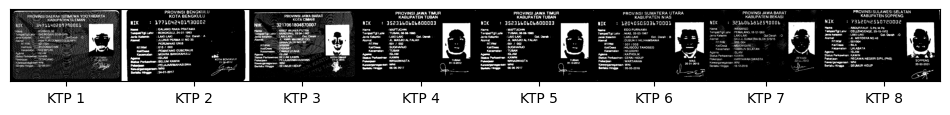

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

# List of image paths
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Number of images to display in each row
images_per_row = 8

# Common height for resizing
common_height = 1000  # Adjust as needed

# Process and display images in a grid
for i in range(0, len(image_paths), images_per_row):
    # Read and preprocess images for the current row
    images_row = [preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i+images_per_row]]

    # Resize images to a common height while maintaining aspect ratio
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Concatenate images horizontally
    row_image = np.concatenate(images_row_resized, axis=1)

    # Display the row of images with titles and a ruler
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.imshow(row_image, cmap='gray')

    # Set ticks and labels
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # No ticks on the y-axis
    ax.set_xticklabels([f'KTP {i+1}' for i in range(len(ticks))])

    # Show the plot
    plt.show()


---
## **2. Ekstraksi Fitur**
---

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 1, cv2.NORM_MINMAX)
    return norm

def extract_features(image):
    # Convert image to flattened array
    arr = image.reshape((image.shape[0] * image.shape[1], 1))
    # Calculate features
    features = np.array([np.sum(arr), np.var(arr), np.std(arr)])
    return features

# List of image paths
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Process
for i in range(0, len(image_paths), images_per_row):
    # Extract features for each image
    for j, img in enumerate(images_row):
        features = extract_features(img)
        print(f'Image {i + j + 1} Features: {features}')


Image 1 Features: [1.7769300e+05 1.8633980e-01 4.3167094e-01]
Image 2 Features: [3.75220000e+04 1.50787426e-01 3.88313566e-01]
Image 3 Features: [1.78735000e+05 1.80445865e-01 4.24789201e-01]
Image 4 Features: [2.38690000e+04 1.35340608e-01 3.67886678e-01]
Image 5 Features: [2.38690000e+04 1.35340608e-01 3.67886678e-01]
Image 6 Features: [3.58370000e+04 1.30771053e-01 3.61622805e-01]
Image 7 Features: [8.58030000e+04 1.17104891e-01 3.42205920e-01]
Image 8 Features: [6.29950000e+04 1.35323048e-01 3.67862811e-01]


---
## **3. Deteksi Object dan Contour**
---

<ipython-input-6-3afd25073d19>:77: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, images_per_row, j + 1 + images_per_row)


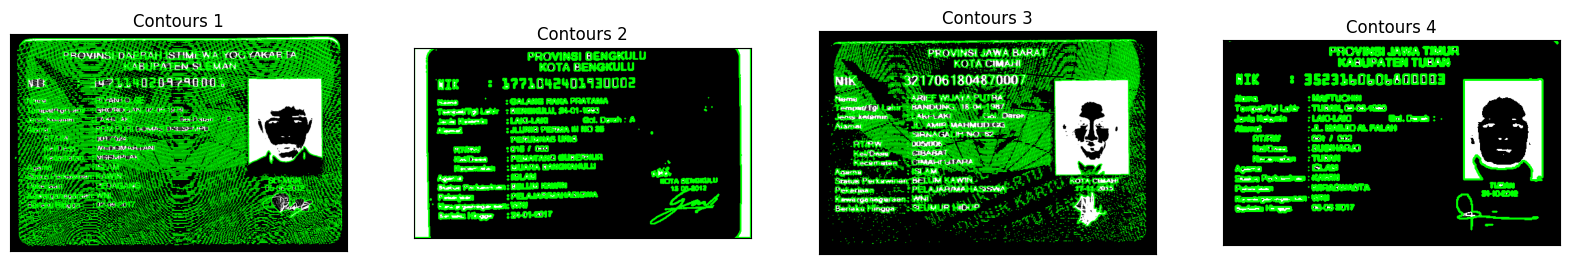

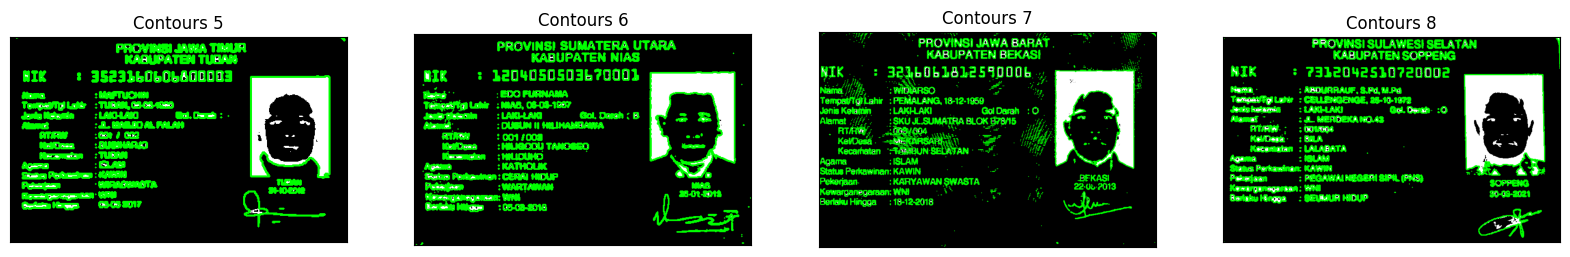

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Convert image to binary using Otsu's thresholding
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    # Normalize image
    norm = cv2.normalize(binary, None, 0, 255, cv2.NORM_MINMAX)
    return norm

def extract_features(image):
    # Convert image to flattened array
    arr = image.reshape((image.shape[0] * image.shape[1], 1))
    # Calculate features
    features = np.array([np.sum(arr), np.var(arr), np.std(arr)])
    return features

def detect_objects(image):
    # Find contours in the image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on a copy of the image with a specific color
    image_with_contours = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Change (0, 255, 0) to your desired color

    return image_with_contours, contours

# List of image paths
image_paths = [
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp1.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp2.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp3.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp4.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp5.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/ktp6.png',
    '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan/KTP7.jpeg',
]

# Number of images to display in each row
images_per_row = 4

# Common height for resizing
common_height = 800  # Adjusted for larger size

# Process and display images in a grid
for i in range(0, len(image_paths), images_per_row):
    # Read and preprocess images for the current row
    images_row = [preprocess(cv2.imread(img_path)) for img_path in image_paths[i:i+images_per_row]]

    # Resize images to a common height while maintaining aspect ratio
    aspect_ratios = [img.shape[1] / img.shape[0] for img in images_row]
    heights = [int(common_height) for _ in range(len(images_row))]
    widths = [int(common_height * aspect_ratio) for aspect_ratio in aspect_ratios]

    images_row_resized = [cv2.resize(img, (width, height)) for img, width, height in zip(images_row, widths, heights)]

    # Concatenate images horizontally
    row_image = np.concatenate(images_row_resized, axis=1)

    # Display the row of images with titles and a ruler
    fig, ax = plt.subplots(figsize=(20, 8))  # Larger figsize
    ax.imshow(row_image, cmap='gray')

    # Set ticks and labels
    ticks = np.cumsum(widths) - widths[0] / 2
    ax.set_xticks(ticks)
    ax.set_yticks([])  # No ticks on the y-axis
    ax.set_xticklabels([f'Image {i+1}' for i in range(len(ticks))])

    # Detect objects and display contours
    for j, img in enumerate(images_row):
        image_with_contours, contours = detect_objects(img)
        ax = plt.subplot(2, images_per_row, j + 1 + images_per_row)
        ax.imshow(image_with_contours)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Contours {i + j + 1}')

    # Show the plot
    plt.show()


---
## **4. Teks Hasil OCR**
---

In [7]:
# Import Library
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [8]:
class KTPInformation(object):
    def __init__(self):
        # Inisialisasi atribut-atribut untuk menyimpan informasi dari KTP
        self.nik = ""
        self.nama = ""
        self.tempat_lahir = ""
        self.tanggal_lahir = ""
        self.jenis_kelamin = ""
        self.golongan_darah = ""
        self.alamat = ""
        self.rt = ""
        self.rw = ""
        self.kelurahan_atau_desa = ""
        self.kecamatan = ""
        self.agama = ""
        self.status_perkawinan = ""
        self.pekerjaan = ""
        self.kewarganegaraan = ""
        self.berlaku_hingga = "SEUMUR HIDUP"  # Menambahkan atribut dengan nilai default

In [9]:
# Install library tesseract-ocr dan pytesseract
# Perintah di bawah ini menginstal Tesseract OCR, sebuah perangkat lunak pengenalan teks open-source.
!sudo apt install tesseract-ocr

# Perintah di bawah ini menggunakan pip untuk menginstal library Pytesseract.
# Pytesseract adalah wrapper Python untuk Tesseract OCR yang memungkinkan penggunaan Tesseract OCR dengan Python.
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [10]:
# Install library tesseract-ocr dan pytesseract
# Perintah di bawah ini menginstal Tesseract OCR, sebuah perangkat lunak pengenalan teks open-source.
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [11]:
import cv2  # Library OpenCV untuk pemrosesan citra
import json  # Library untuk mengelola data JSON
import re  # Library untuk operasi regular expression (regex)
import numpy as np  # Library untuk operasi matematika menggunakan array
import pytesseract  # Wrapper Python untuk Tesseract OCR
import matplotlib.pyplot as plt  # Library untuk visualisasi data
from PIL import Image  # Library untuk manipulasi gambar

class KTPOCR(object):
    def __init__(self, image):
        # Membaca gambar KTP menggunakan OpenCV
        self.image = cv2.imread(image)
        self.gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)  # Mengonversi gambar ke citra keabuan
        self.th, self.threshed = cv2.threshold(self.gray, 127, 255, cv2.THRESH_TRUNC)  # Thresholding citra
        self.result = KTPInformation()  # Membuat instance dari kelas KTPInformation
        self.master_process()  # Memulai proses ekstraksi informasi dari KTP

    # Fungsi untuk melakukan pengolahan citra menggunakan Tesseract OCR
    def process(self, image):
        raw_extracted_text = pytesseract.image_to_string((self.threshed), lang="ind")
        return raw_extracted_text

    # Fungsi konversi huruf ke angka untuk data spesifik (NIK)
    def word_to_number_converter(self, word):
        word_dict = {
            '|' : "1"
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res

    # Fungsi untuk ekstraksi NIK dari hasil ekstraksi teks
    def nik_extract(self, word):
        word_dict = {
            'b' : "6",
            'e' : "2",
        }
        res = ""
        for letter in word:
            if letter in word_dict:
                res += word_dict[letter]
            else:
                res += letter
        return res

    # Fungsi untuk mengekstrak informasi dari hasil teks yang diekstraksi
    def extract(self, extracted_result):
      # Proses pemrosesan teks yang diekstraksi untuk mendapatkan informasi spesifik KTP
        # Proses ini dilakukan dengan mengidentifikasi kata kunci dan pola pada teks hasil ekstraksi
        # dan menyesuaikannya dengan atribut-atribut pada kelas KTPInformation

        # (Kode ini perlu disesuaikan dengan struktur dan format teks yang dihasilkan oleh Tesseract OCR)

        #print(extracted_result.replace('\n', ' -- '))
        for word in extracted_result.split("\n"):
            if "NIK" in word:
                word = word.split(':')
                self.result.nik = self.nik_extract(word[-1].replace(" ", ""))
                continue

            if "Nama" in word:
                word = word.split(':')
                self.result.nama = word[-1].replace('Nama ','')
                continue

            if "Tempat" in word:
                word = word.split(':')
                self.result.tanggal_lahir = re.search("([0-9]{2}\-[0-9]{2}\-[0-9]{4})", word[-1])[0]
                self.result.tempat_lahir = word[-1].replace(self.result.tanggal_lahir, '')
                continue

            if 'Darah' in word:
                self.result.jenis_kelamin = re.search("(LAKI-LAKI|LAKI|LELAKI|PEREMPUAN)", word)[0]
                word = word.split(':')
                try:
                    self.result.golongan_darah = re.search("(O|A|B|AB)", word[-1])[0]
                except:
                    self.result.golongan_darah = '-'
            if 'Alamat' in word:
                self.result.alamat = self.word_to_number_converter(word).replace("Alamat ","")
            if 'NO.' in word:
                self.result.alamat = self.result.alamat + ' '+word
            if "Kecamatan" in word:
                self.result.kecamatan = word.split(':')[1].strip()
            if "Desa" in word:
                wrd = word.split()
                desa = []
                for wr in wrd:
                    if not 'desa' in wr.lower():
                        desa.append(wr)
                self.result.kelurahan_atau_desa = ''.join(wr)
            if 'Kewarganegaraan' in word:
                self.result.kewarganegaraan = word.split(':')[1].strip()
            if 'Pekerjaan' in word:
                wrod = word.split()
                pekerjaan = []
                for wr in wrod:
                    if not '-' in wr:
                        pekerjaan.append(wr)
                self.result.pekerjaan = ' '.join(pekerjaan).replace('Pekerjaan', '').strip()
            if 'Agama' in word:
                self.result.agama = word.replace('Agama',"").strip()
            if 'Perkawinan' in word:
                self.result.status_perkawinan = word.split(':')[1]
            if "RT/RW" in word:
                word = word.replace("RT/RW",'')
                self.result.rt = word.split('/')[0].strip()
                self.result.rw = word.split('/')[1].strip()

    # Fungsi utama yang mengawal proses ekstraksi informasi dari KTP
    def master_process(self):
        # Proses utama yang memicu pengolahan teks menggunakan Tesseract OCR dan ekstraksi informasi KTP
        raw_text = self.process(self.image)
        self.extract(raw_text)

    # Fungsi untuk mengonversi hasil ekstraksi informasi KTP ke dalam format JSON
    def to_json(self):
        return json.dumps(self.result.__dict__, indent=4)


Processing image: ktp.png


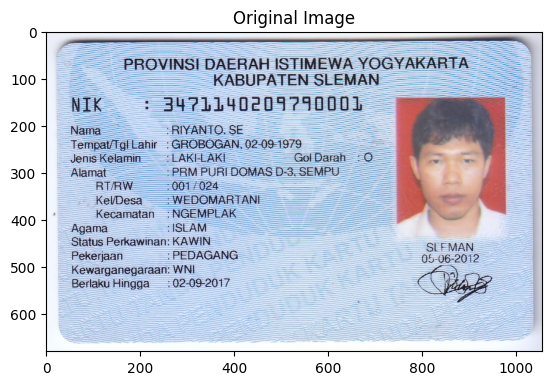

em

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK : 34711140209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN. 02-09-1979

Jenis Kelamin : LAKI-LAKI Gol Darah : 0

Alamat PRM PURI DOMAS D-3. SEMPU
RTRW 1001 1024

Kel/Desa : WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama "ISLAM
Status Bean KAWIN SLEMAN
Pekerjaan : PEDAGANG 05-06-2012

Kewarganegaraan: WNI HI —
Berlaku Hingga :02-09-2017 NIA

   
 

 


Processing image: ktp1.png


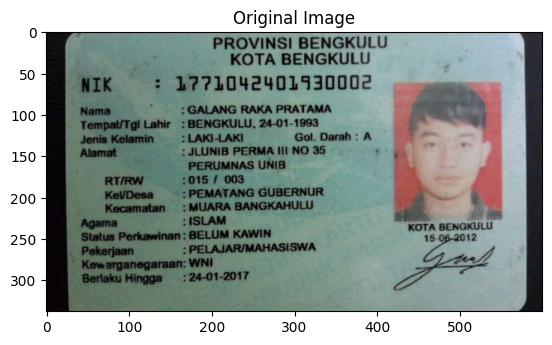

PROVINSI BENGKULU
KOTA BENGKULU

NIK 2 19791012101430002

Nama
Tempat/TgI Lahir
Jenis Kelamin
Alamat

RTRW
KevDesa
Kecamatan

Agama
Status Perkawinan :

Kewarganegaraan:
Berlaku Hingga:

: GALANG RAKA PRATAMA

: BENGKULU, 24-01-1993

# LAKI-LAKI Gol. Darah : A
1 JLUNIB PERMA III NO 35

PERUMNAS UNIB

1015 / 003
: PEMATANG GUBERNUR
: MUARA BANGKAHULU
ISLAM sk
BELUM KAWIN KOTA BENGKULU
: PELAJAR/MAHASISWA —

WNI 212
24-01-2017 AA La


Processing image: ktp2.png


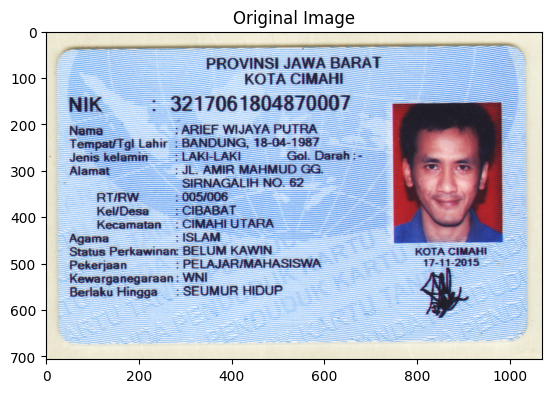

PROVINSI JAWA BARAT

 

KOTA CIMAHI
NIK : 3217061804870007
Nama 1 ARIEF WIJAYA PUTRA
Tempat/Tgi Lahir : BANDUNG, 18-04-1987
Jenis kelamin : LAKI-LAKI Gol. Darah :-
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW 1005/2006

Kel/Desa : CIBABAT

Kecamatan : CIMAHI UTARA
Agama : ISLAM
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan : PELAJAR/MAHASISWA 17-11-2015
Kewarganegaraan : WNI

Berlaku Hingga

: SEUMUR HIDUP


Processing image: ktp3.png


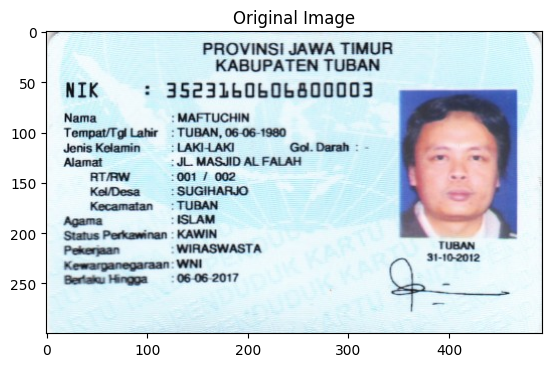

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK: 3523150404800003
Nama MArTUCHIN
Tompat/Tgi Lahir TUBAN, 05.06 1980
Jenis Kolamin LAKI LAKI Got Daran
Mamat IL MASJID AL FALAH
BTAW 0011 002
KolDesa — SUGIHARIO 5 8
Kecamatan — TUBAN
ISLAM 8 Y
Kawi

 

WIRASWASTA tuBAN
kewarganegaraan WNI — Arweoi

Berak Hungga 06 06 2017

 


Processing image: ktp4.png


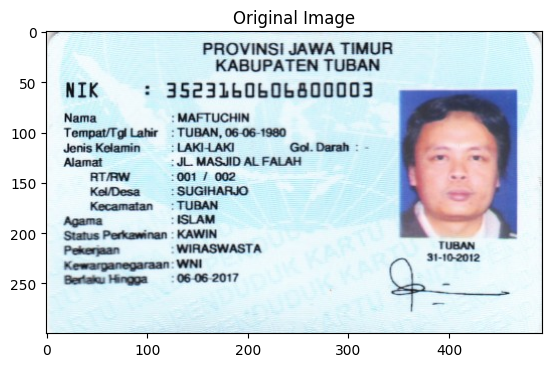

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK: 3523150404800003
Nama MArTUCHIN
Tompat/Tgi Lahir TUBAN, 05.06 1980
Jenis Kolamin LAKI LAKI Got Daran
Mamat IL MASJID AL FALAH
BTAW 0011 002
KolDesa — SUGIHARIO 5 8
Kecamatan — TUBAN
ISLAM 8 Y
Kawi

 

WIRASWASTA tuBAN
kewarganegaraan WNI — Arweoi

Berak Hungga 06 06 2017

 


Processing image: ktp5.png


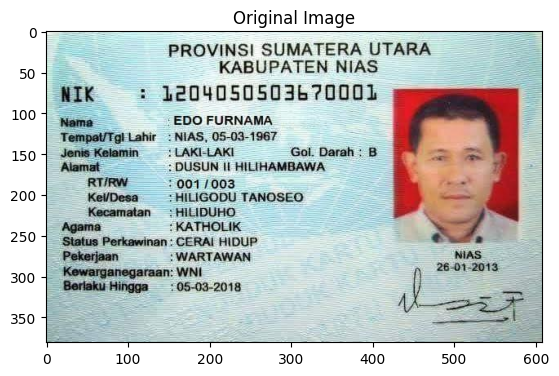

PROVINSI SUMATERA UTARA
KABUPATEN NIAS

NIK 1 12010505036 70001

Nama EDO FURNAMA
Tempat/Tgl Lahir: NIAS, 05-03-1967
Jenis Kelamin: LAKI-LAKI Gol. Darah : B 3:
Alamat : DUSUN II HILIHAMBAWA

RTIRW 001/003

Kel/Desa HILIGODU TANOSEO

Kecamatan : HILIDUHO
Agama KATHOLIK RN 4
Status Perkawinan: CERAI HIDUP Li .
Pekerjaan : WARTAWAN NIAS
Kewarganegaraan: WNI mena aoi
Berlaku Hingga — :05-03-2018 |

——35

8 —
5
|


Processing image: ktp6.png


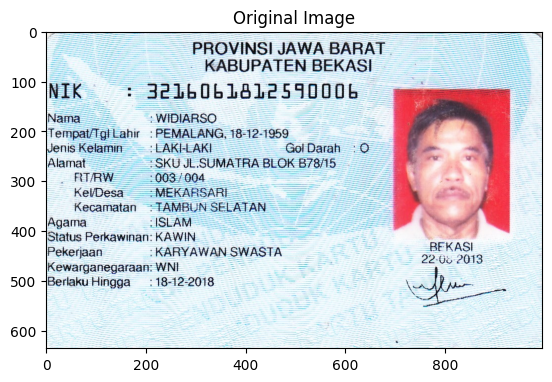

PROVINSI JAWA BARAT
KABUPATEN BEKASI

NIK 1 30160b1012590006 en
Nama : WIDIARSO #
Tempat/Tgl Lahir : PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah : 0
Alamat :SKU JLLSUMATRA BLOK B78/15
RTRW 0903 004
Kel/Desa : MEKARSARI 3
Kecamatan: TAMBUN SELATAN
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan KARYAWAN SWASTA Aa

22-6u 2013
Kewarganegaraan: WNI tua
Berlaku Hingga :18-12-2018 N Jo

 

-———


Processing image: KTP7.jpeg


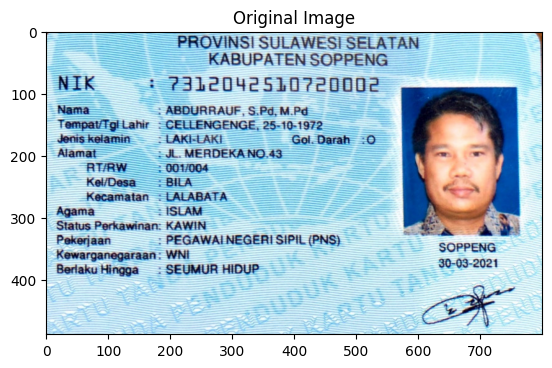

NIK

Nama
Tempat/Tgi Lahir
Jenis kelamin
Alamat
RTRW
Kei/Desa
Kecamatan
Agama
Status Perkawinan
Pekerjaan
Kewarganegaraan
Berlaku Hingga

1 001/004

PROVINSI SULAWESI SELATAN
KABUPATEN SOPPENG

731001420510720002

ABDURRAUF. S.Pd, M.Pd
CELLENGENGE. 25-10-1972
LAKI-LAKI Gol. Darah .O
JL. MERDEKA NO.43

BILA

LALABATA

ISLAM

KAWIN

PEGAWAI NEGERI SIPIL (PNS)
WNI

 

aa
SOPPENG

SEUMUR HIDUP 30-03-2021

TK
——

 



In [12]:
# LEGACY VERSION

import os  # Library untuk interaksi dengan sistem operasi
import cv2  # Library OpenCV untuk pemrosesan citra
import numpy as np  # Library untuk operasi matematika menggunakan array
import pytesseract  # Wrapper Python untuk Tesseract OCR
import matplotlib.pyplot as plt  # Library untuk visualisasi data
from PIL import Image  # Library untuk manipulasi gambar
import sys  # Library untuk interaksi dengan sistem operasi

class KTPOCR:
    def __init__(self, image_folder):
        self.image_folder = image_folder  # Inisialisasi folder gambar

    # Fungsi untuk memproses gambar menggunakan Tesseract OCR
    def process_image(self, image_path):
        img = cv2.imread(image_path)  # Membaca gambar dari path
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Mengubah gambar ke citra keabuan

        ## (2) Threshold
        th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)  # Thresholding citra

        ## (3) Detect
        result = pytesseract.image_to_string(threshed, lang="ind")  # Mendeteksi teks pada citra menggunakan Tesseract OCR

        final = []

        ## (5) Normalize
        for word in result.split("\n"):
            if "”—" in word:
                word = word.replace("”—", ":")  # Mengganti karakter khusus menjadi tanda titik dua (:)

            # Normalisasi NIK
            if "NIK" in word:
                nik_char = word.split()
            if "?" in word:
                word = word.replace("?", "7")  # Mengganti karakter tanda tanya (?) menjadi angka 7

            final.append(word)

        return final, img  # Mengembalikan hasil ekstraksi teks dan gambar

    # Fungsi untuk menampilkan informasi dari setiap gambar dalam folder
    def display_info(self):
        for filename in os.listdir(self.image_folder):
            if filename.endswith(('.jpg', '.png', '.jpeg')):
                image_path = os.path.join(self.image_folder, filename)  # Path menuju gambar
                print(f"\nProcessing image: {filename}")
                extracted_data, image = self.process_image(image_path)  # Proses ekstraksi teks dan gambar

                # Menampilkan gambar asli
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Original Image')
                plt.show()

                # Menampilkan data yang diekstraksi
                for item in extracted_data:
                    print(item)

if __name__ == "__main__":
    try:
        image_folder = '/content/drive/MyDrive/MachineLearning/UASMachineLearning_BrianFebryanFafan'
    except:
        image_folder = None
        print('')
    if image_folder:
        ocr = KTPOCR(image_folder)  # Membuat instance KTPOCR dengan folder gambar yang ditentukan
        ocr.display_info()  # Menampilkan informasi yang diekstraksi dari gambar dalam folder